# <div align="center"> 2.5 Survey data mining with a gender perspective 
<img src="Logo-gender-data.png" width="300" height="300">

## Import necesary modules 

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

## Reading data

In [28]:
df_gender = pd.read_csv('data/prepared/Survey_on_Gender_Equality_At_Home/Survey_on_Gender_Equality_At_Home_2_cleaned.csv')

## Explore and clean

In [29]:
df = df_gender.copy()
df.head()

,Year,Region,Country,Internet_Penetration,Gender,a1_agree,a1_neutral,a1_disagree,a2_opps_other,a3_yes,...,d6_wait,d7_bored,d7_food,d7_health,d7_info,d7_loan,d7_money,d7_none,d7_stuck,d7_work
0,2020,North America,Canada,95 to 100%,Female,93,1,5,7.40,54,...,33,30,30,33,33,19,35,7,37,32
1,2020,North America,Canada,95 to 100%,Male,92,2,5,7.62,59,...,31,31,28,26,29,19,33,6,35,36
2,2020,North America,Canada,95 to 100%,Combined,93,2,5,7.55,56,...,32,31,29,30,31,19,34,6,36,34
3,2020,North America,United States of America,70 to 75%,Female,90,3,7,7.42,50,...,36,32,34,28,42,17,39,7,37,33
4,2020,North America,United States of America,70 to 75%,Male,89,4,8,7.88,64,...,28,27,28,25,40,17,33,8,32,35


The columns are labeled with names that are not clear, we can rename them and filter the database to keep only the variables that are now of interest.   

In [30]:
df = df[['Country','Gender','Internet_Penetration','a1_agree','b7_full']]
df.rename(columns={'a1_agree':'Equal_Rights','b7_full':'Access_Money'},inplace=True)

Let's see the values of Internet_Penetration

In [31]:
print(df['Internet_Penetration'].unique())

['95 to 100%' '70 to 75%' '75 to 80%' '40 to 45%' '45 to 50%' '35 to 40%'
 '80 to 85%' '85 to 90%' '15 to 20%' '65 to 70%' '5% or less' '60 to 65%'
 '.' '10 to 15%' '5 to 10%' '50 to 55%' '55 to 60%' '25 to 30%'
 '20 to 25%' '90 to 95%' '30 to 35%' '50 to 65%']


It seems that we need some work here. We will remove the dot (which corresponds to regions not countries) and take the first value and change the type of data to numeric.

In [32]:
df = df[df['Internet_Penetration']!='.']
df['Internet_Penetration'] = [float(df.loc[i,'Internet_Penetration'][:2]) 
                              if df.loc[i,'Internet_Penetration'][1].isalnum() 
                              else float(df.loc[i,'Internet_Penetration'][:1]) for i in df.index]

Let's see the values of Equal_Rights

In [33]:
print(df['Equal_Rights'].unique())

[93 92 90 89 91 94 84 76 80 82 79 86 87 95 81 78 83 88 97 96 49 65 69 71
 75 61 73 68 74 85 67 77 64 19 72 70 66]


There is an outlier (19), we can see to which country it correspond to before removing. 

In [34]:
df[df['Equal_Rights']==19]['Country']

299    Benin
Name: Country, dtype: object

In [35]:
df = df[df['Equal_Rights']!=19] #Remove outlier

## Analysis

Now, we will plot three relations. The first between Internet penetration and Equal rights perception, the second between Internet penetration and self access of money, and finally on Equal rights perception and Self access to money. We will see a scatter plot and a a linear regression to see the tendencies of the relation between these variables.  

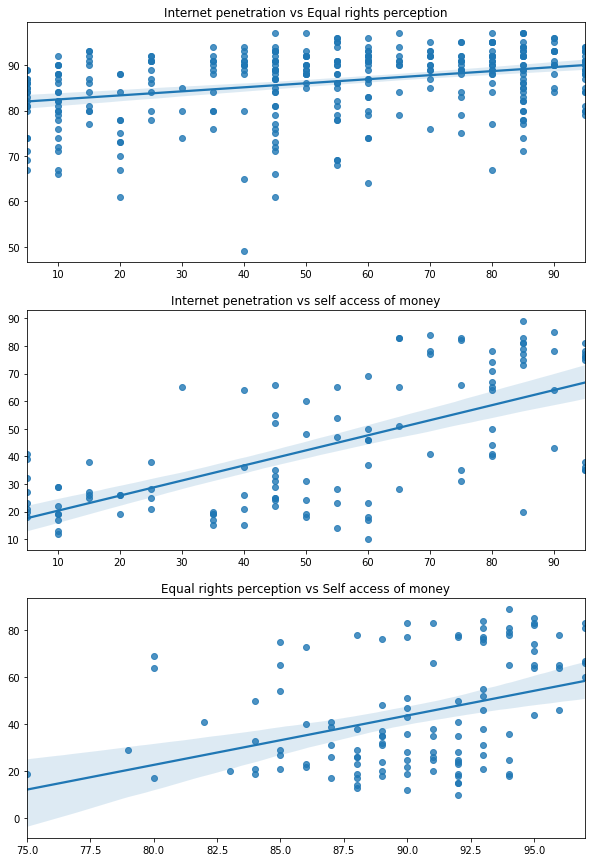

In [36]:
figure, axes = plt.subplots(3,1,figsize=(10,15))
sns.regplot(x=df['Internet_Penetration'],y=df['Equal_Rights'],ax=axes[0]).set(
    title='Internet penetration vs Equal rights perception',xlabel='',ylabel='')
df_female = df[df['Gender']=='Female']
sns.regplot(x=df_female['Internet_Penetration'],y=df_female['Access_Money'],ax=axes[1]).set(
    title='Internet penetration vs self access of money',xlabel='',ylabel='')
sns.regplot(x=df_female['Equal_Rights'],y=df_female['Access_Money'],ax=axes[2]).set(
    title='Equal rights perception vs Self access of money',xlabel='',ylabel='')
plt.show()

It looks like there is a positive relation between the three variables. We can test this statistically with a correlation proof, which gives a mesure of the relation of the variables.   

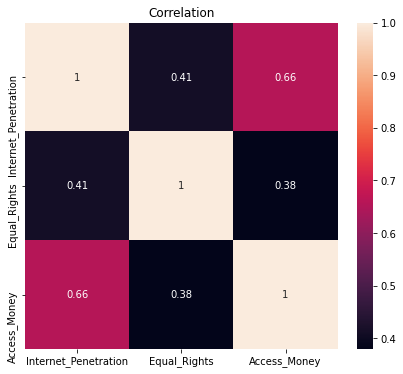

In [37]:
fig = plt.figure(figsize=(7,6)) 
sns.heatmap(df_female.corr(),annot=True).set_title('Correlation')
plt.show()

In [38]:
df_gender = df

## Survey on Future of business 

In [39]:
df_business = pd.read_csv('data/prepared/Survey_on_future_business/Survey_on_future_business_good_clean.csv')
df = df_business.copy()

In [40]:
df.head()

,value,statistic,variable,country,total_asked,who_was_asked
0,I'm not sure,17,bus_cdt_text,AE,187,Owners/Managers of SMB Businesses
1,No,142,bus_cdt_text,AE,187,Owners/Managers of SMB Businesses
2,Yes,24,bus_cdt_text,AE,187,Owners/Managers of SMB Businesses
3,NaN,4,bus_cdt_text,AE,187,Owners/Managers of SMB Businesses
4,I'm not sure,5,bus_cdt_text,AL,75,Owners/Managers of SMB Businesses


First, the variable "statistic" is the number of responds in each category. Then, to calculate the percentages this columns will be divided by "total_asked" and multiplied by 100. 	 

In [41]:
df['statistic'] = round(df['statistic']/df['total_asked']*100,2)

The names of the countries are in alpha-2 code, then, to obtain information we need to match it with the names of the correspondent countries. To do that we downloaded a csv with the apha-2 code and their correspondent countries from this list https://www.iban.com/country-codes. Let us open this list.

In [42]:
df_codes = pd.read_csv('data/prepared/Country_Code.csv')
df_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


There are more variables here, we will take only the relevant ones, "Country" and "Alpha-2 code" 

In [43]:
df_codes = df_codes[[ 'Country','Alpha-2 code']]  

Now , we can merge the two tables.

In [44]:
df = df_codes.merge(df,left_on='Alpha-2 code',right_on='country')

We will take only the variables of interest: "gen_opn_1_text", "gen_opn_2_text" and "own_fem_text". This is a different process than before because the variables are listed in a column. First we will eliminate the columns that we will not use anymore as "country", "who_was_asked" and "total_asked", then we will take only the rows that coincide with the variables that we are interested in from column "variable" and rename these variables.  

In [45]:
df.drop(columns=['country','who_was_asked','total_asked'],inplace=True)
df = df[(df['variable'] == "gen_opn_1_text") | (df['variable'] == "own_fem_text")]

In [46]:
df.replace(['gen_opn_1_text','own_fem_text'],['Self_perp_equal_rights','Owner_female'],inplace=True)

Now, we can take a look of the values that the chosen variables takes. 

In [47]:
print(df['value'].unique())

['Agree' 'Disagree' 'Strongly agree' 'Strongly disagree' nan
 'All owners are female' 'Exactly half' 'Less than half' 'More than half'
 'None']


The value nan correspond to blanck spaces, with no information, there are several ways to deal with this values, in this case we will drop them.

In [48]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [49]:
df

,Country,Alpha-2 code,value,statistic,variable
0,Albania,AL,Agree,37.33,Self_perp_equal_rights
1,Albania,AL,Disagree,2.67,Self_perp_equal_rights
2,Albania,AL,Strongly agree,53.33,Self_perp_equal_rights
3,Albania,AL,Strongly disagree,2.67,Self_perp_equal_rights
4,Albania,AL,All owners are female,4.00,Owner_female
...,...,...,...,...,...
914,Zambia,ZM,All owners are female,0.74,Owner_female
915,Zambia,ZM,Exactly half,5.15,Owner_female
916,Zambia,ZM,Less than half,5.15,Owner_female
917,Zambia,ZM,More than half,2.21,Owner_female


The table in this form is too difficult to read. We will create new variables that combine the variables and their values, to obtain an structure similar to the Survey on Gender Equality.

In [50]:
for var in df['variable'].unique():
    for val in df[df['variable']==var]['value'].unique():
        df[var+'_'+val] = [df.loc[i,'statistic'] if (df.loc[i,'variable']==var) 
                           & (df.loc[i,'value']==val) else np.nan for i in df.index]
df = df.groupby(['Country']).sum().drop(columns=['statistic'])
df

,Self_perp_equal_rights_Agree,Self_perp_equal_rights_Disagree,Self_perp_equal_rights_Strongly agree,Self_perp_equal_rights_Strongly disagree,Owner_female_All owners are female,Owner_female_Exactly half,Owner_female_Less than half,Owner_female_More than half,Owner_female_None
Country,,,,,,,,,
Albania,37.33,2.67,53.33,2.67,4.00,6.67,1.33,2.67,8.00
Algeria,28.57,23.43,20.57,12.00,1.71,2.29,4.57,0.00,17.14
Angola,25.00,7.14,56.63,3.06,1.53,3.57,6.12,1.02,13.78
Argentina,17.50,0.42,63.75,5.00,0.83,8.75,2.50,2.92,7.08
Australia,26.24,2.97,58.42,1.98,3.47,14.85,0.99,0.99,5.94
...,...,...,...,...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland (the),24.37,3.05,56.35,3.55,1.52,10.15,3.05,2.03,8.12
United States of America (the),28.26,1.09,52.90,4.35,1.45,13.77,2.54,1.45,3.62
Uruguay,19.23,0.00,63.08,6.15,2.31,16.15,2.31,0.77,4.62


These are many variables and we want a simple analysis, then we will group them in only four categories. The concernings of equal rights will be grouped only in "agree" (containing "agree" and "strongly agree") and "disagree" (containing "disagree" and "strongly disagree"), and "Female_owner_Half_or_more" which is the percentage of respondents that said that half or more business are owned by a female.  

In [51]:
df['Equal_rights_agree'] = df['Self_perp_equal_rights_Agree'] + df['Self_perp_equal_rights_Strongly agree']
df['Equal_rights_disagree'] = df['Self_perp_equal_rights_Disagree'] + df[
                                'Self_perp_equal_rights_Strongly disagree']
df['Female_owner_Half_or_more'] = df['Owner_female_All owners are female'] + df[
                                'Owner_female_Exactly half'] + df['Owner_female_More than half']
df['Female_owner_less_than_half'] = df['Owner_female_Less than half'] + df['Owner_female_None']
df = df[['Equal_rights_agree','Equal_rights_disagree','Female_owner_Half_or_more',
         'Female_owner_less_than_half']]
df

,Equal_rights_agree,Equal_rights_disagree,Female_owner_Half_or_more,Female_owner_less_than_half
Country,,,,
Albania,90.66,5.34,13.34,9.33
Algeria,49.14,35.43,4.00,21.71
Angola,81.63,10.20,6.12,19.90
Argentina,81.25,5.42,12.50,9.58
Australia,84.66,4.95,19.31,6.93
...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland (the),80.72,6.60,13.70,11.17
United States of America (the),81.16,5.44,16.67,6.16
Uruguay,82.31,6.15,19.23,6.93


Finally we can see the relation between variables in the following scatter and regression plot.

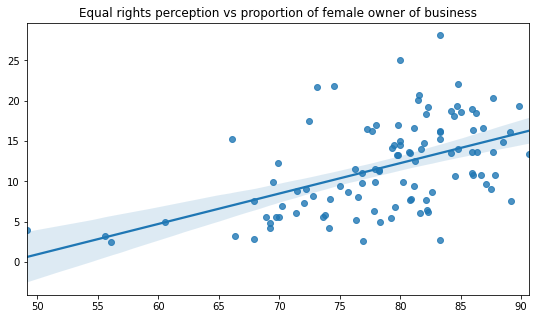

In [52]:
figure, axes = plt.subplots(1,1,figsize=(9,5))
sns.regplot(x=df['Equal_rights_agree'],y=df['Female_owner_Half_or_more']).set(
    title='Equal rights perception vs proportion of female owner of business',xlabel='',ylabel='')
plt.show()

Now, we can see how to use more than one survey at time. We can merge these databases using the countries as the fix variable.

In [53]:
df_business = df.reset_index()
df = df_gender.merge(df_business,on='Country')
df_female = df[df['Gender']=='Female'] 
df_female

,Country,Gender,Internet_Penetration,Equal_Rights,Access_Money,Equal_rights_agree,Equal_rights_disagree,Female_owner_Half_or_more,Female_owner_less_than_half
0,Canada,Female,95.0,93,75,85.97,4.07,19.01,9.50
3,Australia,Female,70.0,92,78,84.66,4.95,19.31,6.93
6,Cambodia,Female,40.0,94,36,80.00,2.43,14.55,17.57
9,Indonesia,Female,35.0,84,19,82.29,8.14,6.23,15.31
12,Japan,Female,80.0,84,50,72.02,17.78,7.29,7.58
...,...,...,...,...,...,...,...,...,...
230,Nigeria,Female,5.0,85,21,74.11,13.94,4.18,12.16
233,Senegal,Female,45.0,84,33,73.61,11.12,5.56,13.89
236,South Africa,Female,50.0,88,19,77.93,9.01,9.91,10.81
239,Uganda,Female,15.0,87,26,77.84,12.66,6.33,22.78


Last, let's see the relation between the variables "Access_Money" and "Female_owner_Half_or_more" and "Internet_Penetration" and "Female_owner_Half_or_more". Remember that they were originally in different surveys.  

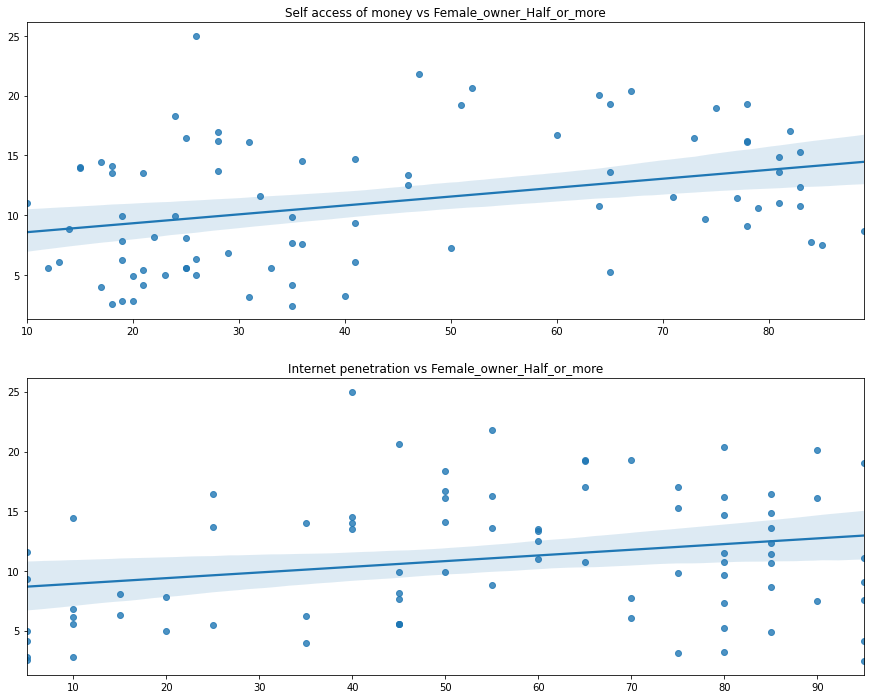

In [54]:
figure, axes = plt.subplots(2,1,figsize=(15,12))
sns.regplot(x=df_female['Access_Money'],y=df_female['Female_owner_Half_or_more'],ax=axes[0]).set(
    title='Self access of money vs Female_owner_Half_or_more',xlabel='',ylabel='')
sns.regplot(x=df_female['Internet_Penetration'],y=df_female['Female_owner_Half_or_more'],ax=axes[1]).set(
    title='Internet penetration vs Female_owner_Half_or_more',xlabel='',ylabel='')

plt.show()

## Conclusions

#### From the survey on gender equality we can conclude that the internet penetration has a positive correlation with the perception of equality and with the full access of females to the household funds. Also the perception of equality in rights have a positive relation with the access to funds. 
#### When we look at the survey about the future of business we see that the percentage of persons who think that women and men should have equal rights is positively correlated with the percentage of persons that said that the proportion of business owned by females are the half or more.  
#### We were able to merge the two databases and compare variables from both of them, and see that there is a positive relation between full access to household funds, and internet penetration with more female owners of business. 
#### This is a very simple example of the information that can be extracted from these two surveys, using data analysis techniques and computational tools. This kind of information evidences the importance of having access to good, organized and meaningful data. 